In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "imperial"

url = base_url + "appid=" + api_key + "&units=" + units + "&q=" + city
url

'http://api.openweathermap.org/data/2.5/weather?appid=3c074c38b572b3a631e8327592872d52&units=imperial&q=London'

In [3]:
weather_response = requests.get(url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 48.65,
  'pressure': 1027,
  'humidity': 76,
  'temp_min': 44.6,
  'temp_max': 54},
 'visibility': 10000,
 'wind': {'speed': 6.93, 'deg': 250},
 'clouds': {'all': 19},
 'dt': 1567732205,
 'sys': {'type': 1,
  'id': 1417,
  'message': 0.0089,
  'country': 'GB',
  'sunrise': 1567747236,
  'sunset': 1567795072},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

In [5]:
city_data = []

print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    city_url = base_url + "appid=" + api_key + "&units=" + units + "&q=" + city
    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print(f"Processing Record | {city}")
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
------------------------
City not found. Skipping...
Processing Record | male
Processing Record | hami
Processing Record | waipawa
Processing Record | jamestown
Processing Record | qaanaaq
Processing Record | marienburg
Processing Record | airai
Processing Record | kavieng
City not found. Skipping...
Processing Record | chuy
Processing Record | hobyo
Processing Record | port hedland
Processing Record | albany
City not found. Skipping...
Processing Record | saskylakh
Processing Record | norman wells
City not found. Skipping...
Processing Record | batagay-alyta
Processing Record | general roca
Processing Record | half moon bay
Processing Record | sijunjung
Processing Record | bubaque
Processing Record | castro
Processing Record | bluff
Processing Record | mataura
Processing Record | beyneu
Processing Record | vaini
Processing Record | yellowknife
Processing Record | garissa
Processing Record | sampit
City not found. Skipping...
City not found. Skipping...
Process

Processing Record | pozarevac
Processing Record | lady frere
Processing Record | songea
Processing Record | atambua
Processing Record | abu samrah
City not found. Skipping...
City not found. Skipping...
Processing Record | kuytun
City not found. Skipping...
Processing Record | voyvozh
Processing Record | gandu
Processing Record | muyezerskiy
Processing Record | aranos
Processing Record | ingham
Processing Record | kungurtug
Processing Record | mount isa
Processing Record | coahuayana
Processing Record | kabinda
Processing Record | wattegama
Processing Record | morgantown
Processing Record | la palma
Processing Record | the valley
Processing Record | san martin
Processing Record | cabo san lucas
Processing Record | kloulklubed
Processing Record | puerto pailas
Processing Record | inhambane
Processing Record | akdepe
Processing Record | turayf
Processing Record | bilibino
Processing Record | vanimo
Processing Record | athens
Processing Record | angoram
City not found. Skipping...
Process

City not found. Skipping...
Processing Record | usinsk
Processing Record | nanakuli
Processing Record | kamwenge
City not found. Skipping...
Processing Record | kawalu
Processing Record | kargasok
Processing Record | ust-kuyga
Processing Record | marawi
Processing Record | baykit
Processing Record | bontang
Processing Record | raton
Processing Record | hagi
Processing Record | coihaique
Processing Record | wuchang
Processing Record | amapa
Processing Record | burgeo
Processing Record | quibdo
Processing Record | genhe
Processing Record | hasaki
Processing Record | almaznyy
Processing Record | sur
City not found. Skipping...
City not found. Skipping...
Processing Record | oliveira dos brejinhos
Processing Record | pajapan
Processing Record | wanning
Processing Record | skegness
Processing Record | kendari
Processing Record | srednekolymsk
Processing Record | kimbe
Processing Record | aksum
Processing Record | kalmunai
Processing Record | rudnaya pristan
Processing Record | svetlogorsk
P

In [7]:
df = pd.DataFrame(city_data)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,male,0,UA,1567732426,95,50.74,33.70,58.09,4.27
1,hami,31,CN,1567732418,36,42.84,93.51,68.89,12.03
2,waipawa,100,NZ,1567732426,90,-39.94,176.59,48.00,3.00
3,jamestown,95,AU,1567732166,85,-33.21,138.60,49.09,21.65
4,qaanaaq,82,GL,1567732427,56,77.48,-69.36,29.83,6.49


In [8]:
df.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [9]:
df.to_csv("cities.csv")

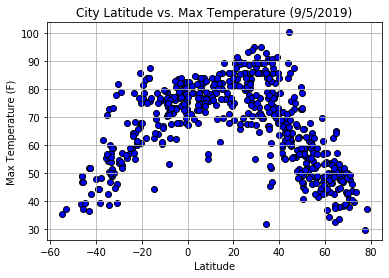

In [10]:
plt.scatter(df.Lat, df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Max Temperature (9/5/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.savefig("Images/max_temp.png")

# Analysis of Max Temp

* Approaching Equator makes the weather warmer and since the month is September northern hemisphere seems warmer than southern hemisphere. 

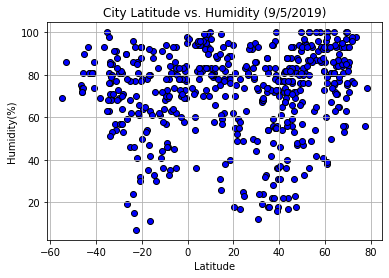

In [9]:
plt.scatter(df.Lat, df['Humidity'], marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Humidity (9/5/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.grid()
#plt.savefig("images/humidity.png")

# Analysis of Humidity

* It seems like there is no correlation between latitude and humidity.

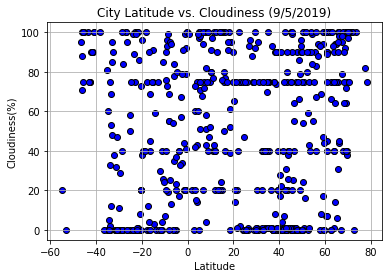

In [10]:
plt.scatter(df.Lat, df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Cloudiness (9/5/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid()
#plt.savefig("images/cloudiness.png")

# Analysis of Cloudiness

* Although there is no relationship between latitude and cloudiness, there is accumulation of cities on level 0, 80 and 100.

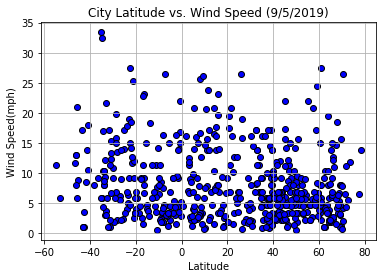

In [11]:
plt.scatter(df.Lat, df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Wind Speed (9/5/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

plt.grid()
#plt.savefig("images/wind_speed.png")

# Analysis of Wind Speed

* As like humidity and cloudiness there is no relationship between latitude and wind speed, but most of cities have wind speed between 0 and 10 (mph).